# Analizador de Espectro
### Lucas Liaño

En esta entrega se solicita generar una función para analizar el espectro de una función dada. La misma debe tener un constructor:

    mi_analizador( xx, ...., (otros parámetros que vos consideres útiles)  )


In [1]:
def mi_analizador(f, N):
    #Primero debemos crear el dominio complejo (k) y las funciones exponenciales que participaran
    
    # Nota 2pi/N = W es una resolución espectral normalizada, pero que no es la real que vas a utilizar para representar.
    # Los criterios de normalización son para calcular la DFT con n y k matrices naturales de 0 a N-1
    
    
    k = np.arange(0,N).astype(int)
    
    n = np.arange(0,N).astype(int)   #Calculamos la base temporal discreta

    Fk = np.zeros(N).astype(complex)    #Generamos un vector vacio con la salida
    
    Wkn = np.zeros([n.size,k.size], dtype = complex)    #k va de 0 a N-1 y n lo mismo
   
    index = 0
    for kloop in k:
        Wkn[:,kloop] = np.exp( -1j * (2*np.pi/N) * kloop * n)
        index += 1
    
    Fk = np.matmul(Wkn,f)
    
    index = 0
    for each in Fk:
        if np.abs(each) < 1e-12:
            Fk[index] = 0 + 0j
        index += 1
            

        
    return k, Fk

In [7]:
# Testbench
import numpy as np
import matplotlib.pyplot as plt

N = 100
fs = 100
f0 = 10

W = fs / (N) #Resolución espectral
Ts = 1/fs

tt = np.arange(0, N*Ts, Ts)

ff = np.sin(2*np.pi*f0 * tt)
k,Fk = mi_analizador(ff, N)

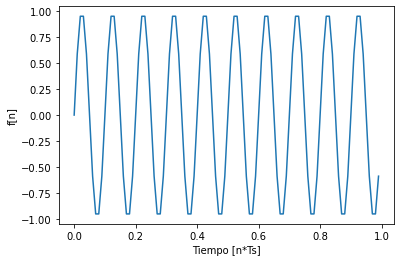

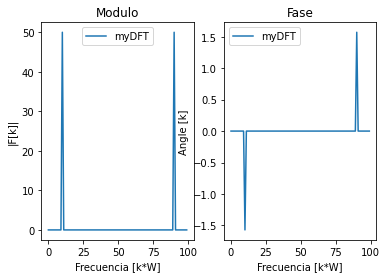

In [9]:
# Plotting time

plt.figure(1)
plt.plot(tt, ff)
plt.xlabel('Tiempo [n*Ts]')
plt.ylabel('f[n]')


fig, (ax1,ax2) = plt.subplots(1,2)  
ax1.plot(k*W, np.abs(Fk), label='myDFT')
ax1.set_xlabel('Frecuencia [k*W]')  
ax1.set_ylabel('|F[k]|')  
ax1.set_title("Modulo") 
ax1.legend()  

ax2.plot(k*W, np.angle(Fk), label='myDFT')  
ax2.set_xlabel('Frecuencia [k*W]')  
ax2.set_ylabel('Angle [k]')  
ax2.set_title("Fase") 
ax2.legend()  